<a href="https://colab.research.google.com/github/kwanglo/mge51101-20195171/blob/master/midterm_project/mge51101_kwanglo_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Skeleton Code for CIFAR dataset

In [0]:
!nvidia-smi
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

Wed Apr 29 10:13:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Model - AlexNet

In [0]:
import torchvision
import torchvision.transforms as transforms

In [0]:
#Added to get running time per epoch
from datetime import datetime

In [0]:
#Model based on AlexNet

# Number of classes
num_classes = 10

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.features = nn.Sequential(
            #Conv1
            nn.Conv2d(3, 96, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            #MaxPool1
            nn.MaxPool2d(kernel_size=2),
            #Conv2
            nn.Conv2d(96, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            #MaxPool2
            nn.MaxPool2d(kernel_size=2),
            #Conv3       
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            #Conv4       
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            #Conv5       
            nn.Conv2d(384, 256, kernel_size=3, padding=1),                        
            nn.ReLU(inplace=True),
            #MaxPool3
            nn.MaxPool2d(kernel_size=3, stride = 2)
        )
        self.classifier = nn.Sequential(
                                        nn.Dropout(),
                                        #FC6
                                        nn.Linear(256, 4096),
                                        nn.ReLU(inplace=True),
                                        nn.Dropout(),
                                        #FC7
                                        nn.Linear(4096, 4096),
                                        nn.ReLU(inplace=True),
                                        #FC8
                                        nn.Linear(4096, num_classes)
        )        
    
    def forward(self, inputs):
        
        hidden = self.features(inputs)
        shapes = hidden.size(1) * hidden.size(2) * hidden.size(3)
        hidden = hidden.view(hidden.size(0), shapes)
        outputs = self.classifier(hidden)
        
        return outputs

model = MyCNN().cuda()

# Loss function & Optimizers
"""
you can change the loss and optimizer
"""
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


# Hyperparameters
"""
you can change the value
"""
num_epochs = 300
batch_size = 512

## Training

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified

train accuracy: 20.42 %, test accuracy: 30.89 %
epoch:1, train_loss: 2.0387, test_loss: 1.7932
Running time = 10:18:51

train accuracy: 63.09 %, test accuracy: 64.63 %
epoch:11, train_loss: 1.0612, test_loss: 1.0484
Running time = 10:25:06

train accuracy: 71.78 %, test accuracy: 71.62 %
epoch:21, train_loss: 0.8346, test_loss: 0.8706
Running time = 10:31:21

train accuracy: 75.36 %, test accuracy: 74.83 %
epoch:31, train_loss: 0.7301, test_loss: 0.7775
Running time = 10:37:37

train accuracy: 78.01 %, test accuracy: 75.29 %
epoch:41, train_loss: 0.6499, test_loss: 0.7629
Running time = 10:43:52

train accuracy: 79.60 %, test accuracy: 76.99 %
epoch:51, train_loss: 0.6100, test_loss: 0.7168
Running time = 10:50:07

train accuracy: 81.34 %, test accuracy: 76.77 %
epoch:61, train_loss: 0.5539, test_loss: 0.7273
Running time = 10:56:26

train accuracy: 82.50 %, test accuracy: 78.07 %
epoch:71, train_loss: 0.5

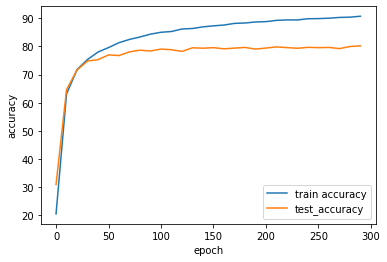

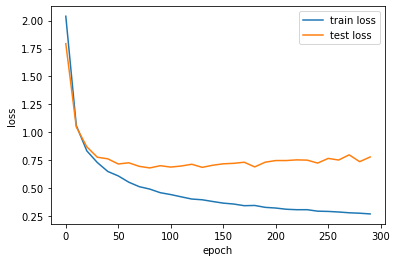

In [0]:
import sys
sys.path.insert(0, "..")
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# CIFAR preprocessing 
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),    
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# DataLoader for CIFAR-10
cifar_train = torchvision.datasets.CIFAR10(root="./", 
                                         train=True, 
                                         download=True,
                                         transform=transform_train
                                         )
cifar_test = torchvision.datasets.CIFAR10(root="./", 
                                        train=False, 
                                        download=True,
                                        transform=transform_test)


train_loader = DataLoader(cifar_train, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=4)

 
accuracy_graph = {'train':[], 'test':[], 'epoch': []}
loss_graph = {'train':[], 'test':[], 'epoch': []}

class accumulator():
    def __init__(self):
        self.cnt = 0
        self.obs = 0
        self.loss = 0

    def add(self, predict, output):

        assert len(predict) == len(output)

        self.cnt += self.count(predict, output).cpu().numpy()
        self.obs += len(predict)
    
    def count(self, predict, output):
        correct = torch.sum(torch.argmax(predict, dim=1) == output)
        
        return correct
        
    def loss_update(self, loss, batch_size):
        self.loss += loss * batch_size

    def running_stat(self):
        if self.obs != 0:
            run_acc = 100 * self.cnt / self.obs
            run_loss = self.loss / self.obs
        else: 
            run_acc = 0
            rum_loss = 0

        return run_acc, run_loss

    def reset(self):
        self.__init__()


for epoch in range(num_epochs):

    train_accuracy = accumulator()
    test_accuracy = accumulator()

    # Training
    for train_x, train_y in train_loader: 

        train_x, train_y = train_x.cuda(), train_y.cuda()
        train_predict = model(train_x)
        loss = criterion(train_predict, train_y)

        # Backpropagation        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_accuracy.add(train_predict, train_y)
        train_accuracy.loss_update(loss, batch_size)

    # Evaluation
    if epoch % 10 ==0:
             
        for test_x, test_y in test_loader:

            with torch.autograd.no_grad():
                test_x, test_y = test_x.cuda(), test_y.cuda()
                test_predict = model(test_x)
                test_accuracy.add(test_predict, test_y)

            loss_test = criterion(test_predict, test_y)
            test_accuracy.loss_update(loss_test, batch_size)

        train_acc, train_loss = train_accuracy.running_stat()
        test_acc, test_loss = test_accuracy.running_stat()
        accuracy_graph['train'].append(train_acc)
        accuracy_graph['test'].append(test_acc) 
        accuracy_graph['epoch'].append(epoch)
        loss_graph['train'].append(train_loss)
        loss_graph['test'].append(test_loss)
        loss_graph['epoch'].append(epoch)
        
        #Get running time per 10 epochs
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")        
        
        print("\ntrain accuracy: {:.2f} %, test accuracy: {:.2f} %".format(train_acc, test_acc))
        print("epoch:{}, train_loss: {:.4f}, test_loss: {:.4f}".format(epoch+1, train_loss, test_loss)) 
        print("Running time =", current_time)
        
        train_accuracy.reset(), test_accuracy.reset()


plt.plot(accuracy_graph['epoch'], accuracy_graph['train'], label = "train accuracy");
plt.plot(accuracy_graph['epoch'], accuracy_graph['test'], label = "test_accuracy");
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

plot_loss_train = plt.plot(loss_graph['epoch'], loss_graph['train'], label="train loss");
plt.plot(loss_graph['epoch'], loss_graph['test'], label="test loss");
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [0]:
#